In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')

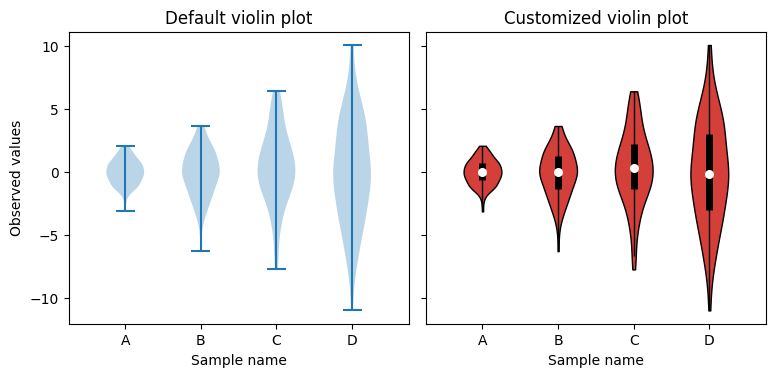

In [6]:
# create test data
np.random.seed(19680801)
data = [sorted(np.random.normal(0, std, 100)) for std in range(1, 5)]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey=True)

ax1.set_title('Default violin plot')
ax1.set_ylabel('Observed values')
ax1.violinplot(data)

ax2.set_title('Customized violin plot')
parts = ax2.violinplot(
        data, showmeans=False, showmedians=False,
        showextrema=False)

for pc in parts['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(1)

quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(1, len(medians) + 1)
ax2.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
ax2.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax2.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)

# set style for the axes
labels = ['A', 'B', 'C', 'D']
for ax in [ax1, ax2]:
    set_axis_style(ax, labels)

plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()

In [25]:
# Set display options to show all columns without wrapping
pd.set_option('display.max_columns', None)  # This will display all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping to the next line
# reading CSV file into field descrptor
fd_4g = pd.read_csv('Data/4G_Passive_measurements.csv')
print(fd_4g.head(10))

fd_5g = pd.read_csv('Data/5G_Passive_measurements.csv')
print(fd_5g.head(10))


   Unnamed: 0        Date          Time           UTC   Latitude  Longitude  Altitude  Speed  EARFCN  Frequency  PCI      MNC  CellIdentity  eNodeB.ID  Power   SINR   RSRP   RSRQ scenario  cellLongitude  cellLatitude  cellPosErrorLambda1  cellPosErrorLambda2  n_CellIdentities    distance  Band                 campaign
0      231098  14.01.2021  09:19:28.214  1.613291e+09  41.896722  12.507302     53.66   4.03    6300      806.0  412  "Op"[1]      76860425     300236 -54.38   6.70 -78.68 -19.41       OW      12.504280     41.890300            10.610001            10.610001                 6  757.483987    20  campaign_6_OW_4G_gaming
1      241306  14.01.2021  09:19:28.214  1.613291e+09  41.896722  12.507302     53.66   4.03    6300      806.0  411  "Op"[1]      76860427     300236 -52.63   5.18 -75.54 -16.26       OW      12.504280     41.890300            10.610001            10.610001                 6  757.483987    20  campaign_6_OW_4G_gaming
2      291097  14.01.2021  09:19:28.840 

In [8]:
print(list(fd.columns))
print("5G-")

['Unnamed: 0', 'Date', 'Time', 'UTC', 'Latitude', 'Longitude', 'Altitude', 'Speed', 'EARFCN', 'Frequency', 'PCI', 'MNC', 'CellIdentity', 'eNodeB.ID', 'Power', 'SINR', 'RSRP', 'RSRQ', 'scenario', 'cellLongitude', 'cellLatitude', 'cellPosErrorLambda1', 'cellPosErrorLambda2', 'n_CellIdentities', 'distance', 'Band', 'campaign']


In [9]:
grouped_by_operator = fd_4g.groupby('MNC')
signal_quality_columns = ['RSRP', 'RSRQ', 'SINR']
summary_stats = grouped_by_operator[signal_quality_columns].agg(['mean', 'median', 'std'])

# Display the summary statistics for each operator
print(summary_stats)


               RSRP                         RSRQ                       SINR                  
               mean median        std       mean median       std      mean median        std
MNC                                                                                          
"Op"[1] -100.161485 -98.98  15.604314 -20.280126 -19.29  5.536481  0.833658   2.23  11.473351
"Op"[2]  -98.142377 -99.16  12.642518 -20.498862 -19.74  5.272834  0.932823   3.17   9.833226


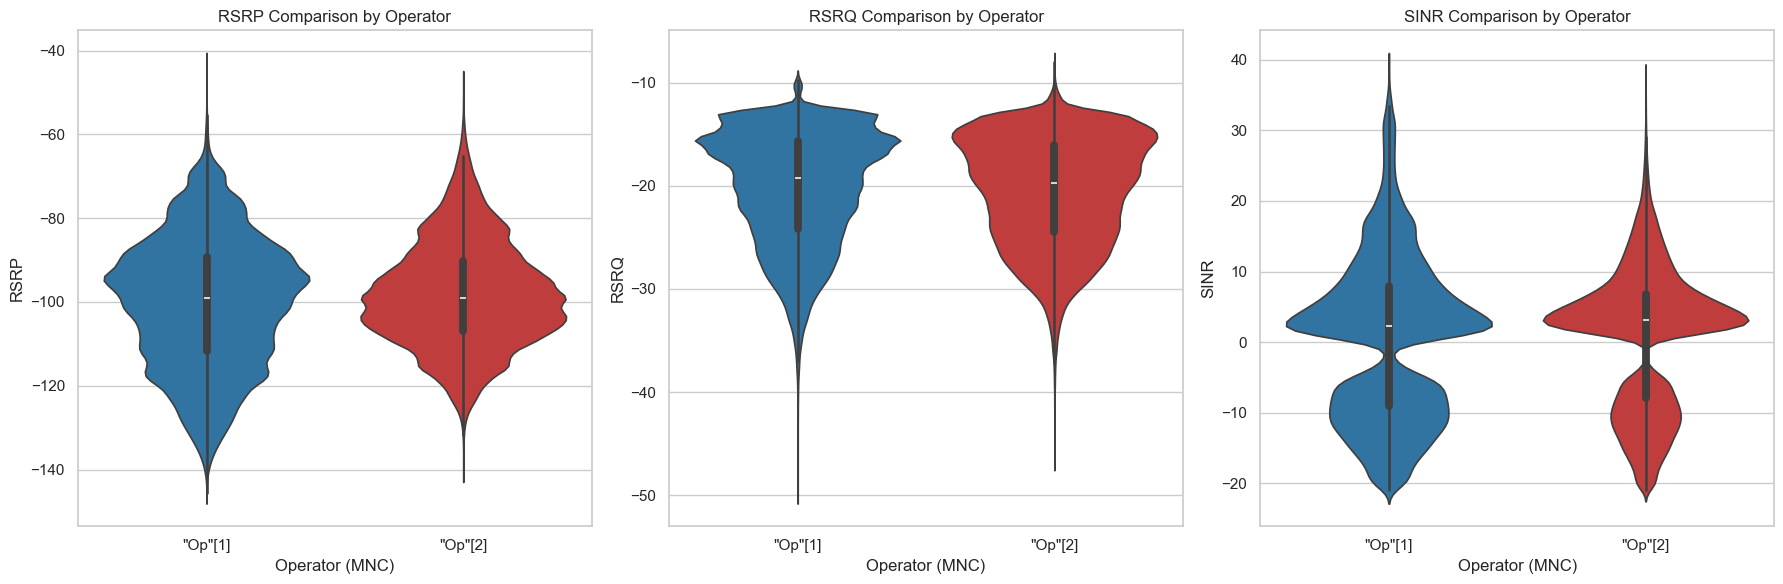

In [24]:
# Create a custom color palette (Blue for "Op"[1], Red for "Op"[2])
custom_palette = {"\"Op\"[1]": "#1f77b4", "\"Op\"[2]": "#d62728"}  # Blue for "Op"[1], Red for "Op"[2]

# Create subplots for RSRP, RSRQ, and SINR
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Violin plot for RSRP
sns.violinplot(x='MNC', y='RSRP', data=fd_4g, hue='MNC', palette=custom_palette, legend=False, ax=axes[0])
axes[0].set_title('RSRP Comparison by Operator')
axes[0].set_xlabel('Operator (MNC)')
axes[0].set_ylabel('RSRP')

# Violin plot for RSRQ
sns.violinplot(x='MNC', y='RSRQ', data=fd_4g, hue='MNC', palette=custom_palette, legend=False, ax=axes[1])
axes[1].set_title('RSRQ Comparison by Operator')
axes[1].set_xlabel('Operator (MNC)')
axes[1].set_ylabel('RSRQ')

# Violin plot for SINR
sns.violinplot(x='MNC', y='SINR', data=fd_4g, hue='MNC', palette=custom_palette, legend=False, ax=axes[2])
axes[2].set_title('SINR Comparison by Operator')
axes[2].set_xlabel('Operator (MNC)')
axes[2].set_ylabel('SINR')

# Adjust layout
plt.tight_layout()
plt.show()

## Summary of Violin Plots for Signal Metrics

### 1. **RSRP (Reference Signal Received Power) Comparison**
   - **RSRP** measures the power of the received signal (in dBm). Lower values indicate weaker signals (closer to -140 dBm), while higher values indicate stronger signals (closer to -60 dBm).
   - **Observations:**
     - Both operators show similar distributions, with most values ranging between -140 dBm and -60 dBm.
     - **Operator 1 ("Op"[1])** has slightly stronger signals on average compared to **Operator 2 ("Op"[2])**, as indicated by the thicker distribution around -100 dBm for Operator 1 and a thinner one for Operator 2.

### 2. **RSRQ (Reference Signal Received Quality) Comparison**
   - **RSRQ** measures the quality of the signal, considering factors like interference and noise (in dB). Lower values indicate poorer quality.
   - **Observations:**
     - **Operator 1 ("Op"[1])** shows better signal quality on average, with RSRQ values centered around -10 to -20 dB.
     - **Operator 2 ("Op"[2])** has a similar distribution but with slightly more data spread out towards lower quality values (between -20 and -40 dB).

### 3. **SINR (Signal to Interference and Noise Ratio) Comparison**
   - **SINR** measures the ratio of signal to interference and noise (in dB). Higher values indicate cleaner, stronger signals with less interference.
   - **Observations:**
     - **Operator 1 ("Op"[1])** shows a higher SINR range, typically between 0 and 30 dB, indicating better signal quality with less interference.
     - **Operator 2 ("Op"[2])** has lower SINR values, ranging from -10 to 20 dB, indicating more interference and lower signal quality on average.

---

### Key Takeaways
- **RSRP (Signal Strength):** Both operators have similar signal strength, but **Operator 1 ("Op"[1])** has a slightly stronger distribution.
- **RSRQ (Signal Quality):** **Operator 1** shows better signal quality compared to **Operator 2**, with values concentrated closer to 0 dB.
- **SINR (Signal to Interference and Noise Ratio):** **Operator 1** provides better overall signal quality with less interference, while **Operator 2** experiences more interference and lower SINR values.
